County dataset

In [2]:
import pandas as pd
#pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
df=pd.read_csv('https://raw.githubusercontent.com/cpaniaguam/CSC104/main/county_complete.csv')

**Question 1: Change in population**

Add a new column pop_change to df with the population change of each county from 2010 to 2017, and answer the following.

    -List the top 10 counties in which pop_change increased the most.
    -List the 10 counties in which pop_change increased the least.
    -List the 10 counties in which pop_change decreased the most. 
    
Produce appropiate visualizations for these statistics.

In [3]:
df["pop_change"] = df["pop2017"]-df["pop2010"]

df.sort_values(by=['pop_change'], inplace = True, ascending = False)

increased = df.name[0:10]
print("Increasing counties:\n",increased)

Increasing counties:
 2623         Harris County
103        Maricopa County
204     Los Angeles County
2969           King County
362      Miami-Dade County
1748          Clark County
2579         Dallas County
2742        Tarrant County
2537          Bexar County
222       San Diego County
Name: name, dtype: object


In [4]:
decreased = df.name[-10:]
print("Decreasing counties:\n",decreased)

Decreasing counties:
 2254               Cambria County
1597               St. Louis city
2090                 Lucas County
2308          Westmoreland County
1255               Genesee County
2060              Cuyahoga County
1312                 Wayne County
76      Hoonah–Angoon Census Area
89                        Skagway
93                       Wrangell
Name: name, dtype: object


In [5]:
selection = df.pop_change >= 0
stagnant = df[selection].name[-10:]
print("Stagnant counties:\n",stagnant)

Stagnant counties:
 2290    Montour County
1710      Logan County
1658     Blaine County
1019    Clinton County
1652     Wibaux County
261     Dolores County
923     Greeley County
2653     Kenedy County
1745    Wheeler County
1034     Graves County
Name: name, dtype: object


**Question 2: Counties populations**

1. What is the mean population  𝑥¯𝑝𝑜𝑝  and standard deviation  𝑠𝑝𝑜𝑝  for all US counties in 2017?

2. What is the median population for all US counties in 2017?

In [6]:
df.sort_values(by=['pop2017'], inplace = True, ascending = False)
pop = df['pop2017']
mean = pop.mean()
stdev = pop.std()
med = pop.median()
print("The mean is:", mean)
print("The standard deviation is:", stdev)
print("The median is:", med)

The mean is: 103763.41350748646
The standard deviation is: 333194.51946075336
The median is: 25857.0


3. List 10 counties (and their respective states) that are within one  𝑠𝑝𝑜𝑝  from the mean population  𝑥¯𝑝𝑜𝑝 . Are there any in the State of Rhode Island?

4. What proportion of all counties fall within one $s_{pop}$ from $\bar{x}_{pop}$?

In [7]:
selection2 = abs(df.pop2017 - mean) < stdev
df2 = df[selection2]
print("10 counties within std from mean:\n",df2.name[0:10])

selection3 = df2.state == "Rhode Island"
df3 = df2[selection3]
print("Four of them are in Rhode Island:\n",df3.name)

prop = (len(df2)/len(df))*100
print(prop,"% of counties fall within std from mean")

10 counties within std from mean:
 2090           Lucas County
107            Pinal County
2553         Cameron County
1332          Dakota County
377         Sarasota County
2249           Berks County
48            Mobile County
2210       Clackamas County
2355        Richland County
1769    Hillsborough County
Name: name, dtype: object
Four of them are in Rhode Island:
 2312          Kent County
2315    Washington County
2313       Newport County
2311       Bristol County
Name: name, dtype: object
94.74856779121579 % of counties fall within std from mean


6. What proportion of all counties do not fall within two standard deviations from $\bar{x}_{pop}$? How many are there? Store them in a data structure of your choice named counties_greater_2sd.

In [8]:
selection4 = abs(df.pop2017-mean) > 2*stdev 
counties_greater_2sd = df[selection4]
prop = (len(counties_greater_2sd)/len(df))*100

print(len(counties_greater_2sd),"counties, or", prop,"% of counties are outside of 2 std")

83 counties, or 2.6416295353278167 % of counties are outside of 2 std


7. Construct a vertical box plot for the pop2017 variable and identify what counties are labeled as outliers. Store these counties in a variable outliers. 


<AxesSubplot:>

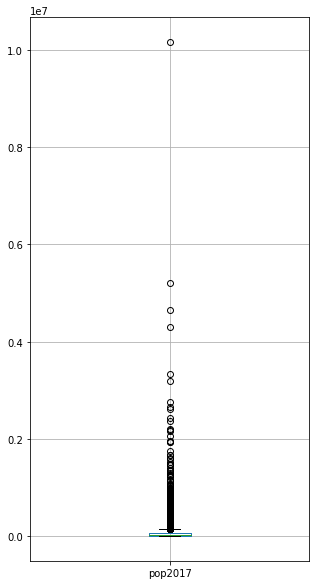

In [27]:
import numpy as np
popu = df.loc[:,['name','pop2017']]
#popu["scale"] = np.log10(popu['pop2017'])
#popu.boxplot(column="scale", figsize = (5 ,10))
popu.boxplot(column="pop2017", figsize = (5 ,10))


In [30]:
q25 = df['pop2017'].quantile(q= 0.25)
q75 = df['pop2017'].quantile(q= 0.75)
iqr = q75 - q25


selection5 = (q75 + 1.5*iqr)<df.pop2017
outliers = df.name[selection5]
print(outliers)
selection6 = (q25 - 1.5*iqr)>df.pop2017
outliers2 = df.name[selection6]
print(outliers2)


204      Los Angeles County
610             Cook County
2623          Harris County
103         Maricopa County
222        San Diego County
               ...         
349     Indian River County
1241         Berrien County
2271        Franklin County
737          Johnson County
462          Houston County
Name: name, Length: 430, dtype: object
Series([], Name: name, dtype: object)
67756.0


8. Which statitic is a better descriptor for pop2017, its mean $\bar{x}_{pop}$ or its median. Explain.

Ideally both can be used at the same time to provide an accurate idea of the data, but if one was picked, the median would be a better descriptor here. The data is heavily right skewed (median is much less than mean), so the median represents the pop of most counties, decreasing the impact of the super dense places like Los Angeles or New York. The mean is skewed because of these outliers (which can be seen in the large standard deviation).

**Question 3**

1. What is the population of the US in 2017?

In [11]:
total = df['pop2017'].sum()
print(total)

325713355.0


2. Define a new variable pop_proportion_2017 with the relative population of each county with respect to the US population in 2017.

In [12]:
df["pop_proportion_2017"] = df["pop2017"]/df["pop2017"].sum()

3. Construct a histogram using pop_proportion_2017 and an adequate number of bins. 

array([[<AxesSubplot:title={'center':'pop_proportion_2017'}>]],
      dtype=object)

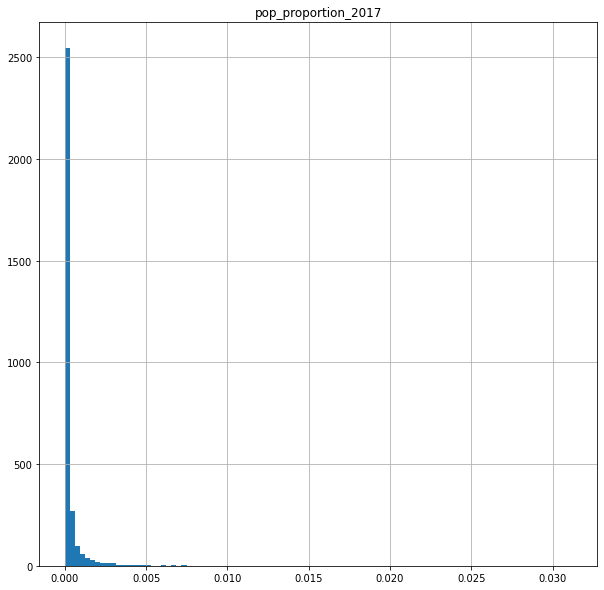

In [18]:


df.hist(column="pop_proportion_2017", bins = 100, figsize = (10, 10))


4. What can you say about this distribution?

This histogram is very right-skewed. This means that most US counties represent a very small proportion of the total US population. This is reasonable because it is a very large country with many vast areas that are unpopulated. It also demonstrates the spread seen in the box plot, where 430 of the largest counties are much more populated than the average town, while also being a very small proportion of the total number of counties.